# **Install, Import and Initialize Libraries**

In [1]:
# Install emoji conversion library
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from os import path
from sklearn.utils import shuffle
import time
import warnings
warnings.filterwarnings('ignore')
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS
import itertools
from collections import Counter
#Text processing
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer #bag of words

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.naive_bayes import MultinomialNB # Naive Bayes
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [3]:
#Download NLTK library
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **Read Data**

In [4]:
df=pd.read_excel('ds1_ds2_ds3_unique_psu.xlsx')

In [5]:
df.head()

,NonFuncationalRequirment,UserReviewDescription
0,Performance,The video player on the App fails to load the ...
1,Security,Not able to log in after update. Our college m...
2,Security,Great value. Cannot find better information fo...
3,Usability,Terrible experience! I have enrolled in the UX...
4,Performance,I wish the app loaded faster. A feature which ...


# **Exploratory Data Analyis**



In [6]:
df.shape

(1621, 2)

In [7]:
list(df.columns)

['NonFuncationalRequirment', 'UserReviewDescription']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1621 entries, 0 to 1620
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NonFuncationalRequirment  1621 non-null   object
 1   UserReviewDescription     1621 non-null   object
dtypes: object(2)
memory usage: 25.5+ KB


In [9]:
df.describe()

,NonFuncationalRequirment,UserReviewDescription
count,1621,1621
unique,3,1573
top,Usability,The app stuck on check your user data screen. ...
freq,796,2


In [10]:
# Count of Null columnwise
print(df.isnull().sum())

NonFuncationalRequirment    0
UserReviewDescription       0
dtype: int64


There are no NULL values in the data

In [11]:
# Select required coulmns
data=df[['UserReviewDescription','NonFuncationalRequirment']]

In [12]:
data.head()

,UserReviewDescription,NonFuncationalRequirment
0,The video player on the App fails to load the ...,Performance
1,Not able to log in after update. Our college m...,Security
2,Great value. Cannot find better information fo...,Security
3,Terrible experience! I have enrolled in the UX...,Usability
4,I wish the app loaded faster. A feature which ...,Performance


In [13]:
data.shape

(1621, 2)

In [14]:
# Unique values for non functional requirements
data['NonFuncationalRequirment'].unique()

array(['Performance', 'Security', 'Usability'], dtype=object)

In [15]:
category_requirement=data['NonFuncationalRequirment'].value_counts()
print(category_requirement)

Usability      796
Performance    689
Security       136
Name: NonFuncationalRequirment, dtype: int64


<Axes: >

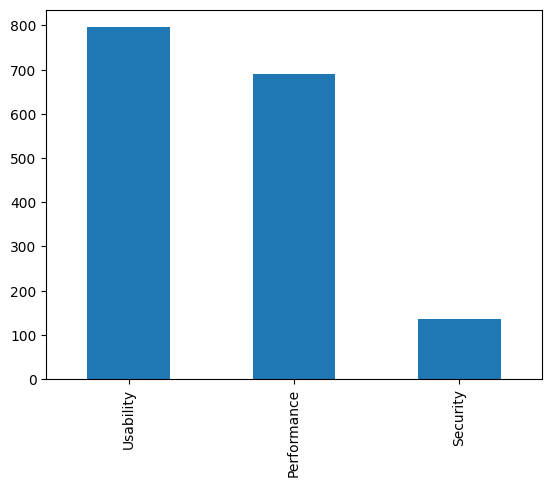

In [16]:
#Data Visualization
category_requirement.plot(kind="bar", fontsize=10)

In [17]:
data.shape

(1621, 2)

Class is imbalanced

# **Text Pre-Processing**

In [18]:
# Remove punctuations, non alphabetic characters, lower and stop words 
def text_process(review):
      
      stops = set(stopwords.words('english'))                         # Defining stop words
          
      review = re.sub('[\n\t\r]+',' ',review)                         # Remove linebreak, tab, return
      review = review.lower()                                         # Convert to lower case
      review = re.sub('[0-9]',' ',review)                             #remove numbers
      modified_sentence=""
      words = nltk.word_tokenize(review)                              # Word Tokenization 
      words_without_stops = [w for w in words if not w in stops]
      modified_sentence =  ' '.join(words_without_stops)
      modified_sentence=modified_sentence.strip()
      review = re.sub('['+string.punctuation+']+','',\
                  modified_sentence)                                  # Remove Punctuations     
      review = re.sub('\s+\s+',' ',review) 
      review=review.strip()                            
      return(review)

In [19]:
# Emoji conversion
def emoji_conversion(review):
    for emot in UNICODE_EMOJI:
        review = review.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return review

In [20]:
# Normalization
lemmatizer = WordNetLemmatizer()

# Lemmatization
def lemmatize(review):
    words = nltk.word_tokenize(review)
    review_lemmatized = ' '.join([lemmatizer.lemmatize(word) for word in words])
    return review_lemmatized

In [21]:
def getCleanReview(review): 
    clean_review = ''
    review = review.strip()
    review = " ".join(review.split())
    review = text_process(review)
    review = emoji_conversion(review)
    review = lemmatize(review)
    clean_review = review
    return clean_review

In [22]:
%time
cleaned_reviews=[]
for index, row in data.iterrows():
  review = getCleanReview(row['UserReviewDescription'])
  #print(review)
  # Append the cleaned review to the list
  cleaned_reviews.append(review)

# Add the cleaned reviews as a new column in the DataFrame
data['cleaned_reviews'] = cleaned_reviews


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs


In [23]:
data.head()

,UserReviewDescription,NonFuncationalRequirment,cleaned_reviews
0,The video player on the App fails to load the ...,Performance,video player app fails load video frequently s...
1,Not able to log in after update. Our college m...,Security,able log update college mandate u course cours...
2,Great value. Cannot find better information fo...,Security,great value find better information small mont...
3,Terrible experience! I have enrolled in the UX...,Usability,terrible experience enrolled ux design course ...
4,I wish the app loaded faster. A feature which ...,Performance,wish app loaded faster feature would let u wat...


In [24]:
data.tail()

,UserReviewDescription,NonFuncationalRequirment,cleaned_reviews
1616,Drains the battery,Performance,drain battery
1617,"It's a great app, and I like the October updat...",Performance,s great app like october update mostly found o...
1618,My second attempt.. The steps revert to 0 for ...,Performance,second attempt step revert apparent reason cau...
1619,My galaxy note 5 is not supporting health app ...,Usability,galaxy note supporting health app showing mine...
1620,Battery drain and can't sync data with my gear...,Usability,battery drain ca nt sync data gear


In [25]:
#Tokenize clean reviews 
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

data["tokens"] = data["cleaned_reviews"].apply(tokenizer.tokenize)
data.head()

,UserReviewDescription,NonFuncationalRequirment,cleaned_reviews,tokens
0,The video player on the App fails to load the ...,Performance,video player app fails load video frequently s...,"[video, player, app, fails, load, video, frequ..."
1,Not able to log in after update. Our college m...,Security,able log update college mandate u course cours...,"[able, log, update, college, mandate, u, cours..."
2,Great value. Cannot find better information fo...,Security,great value find better information small mont...,"[great, value, find, better, information, smal..."
3,Terrible experience! I have enrolled in the UX...,Usability,terrible experience enrolled ux design course ...,"[terrible, experience, enrolled, ux, design, c..."
4,I wish the app loaded faster. A feature which ...,Performance,wish app loaded faster feature would let u wat...,"[wish, app, loaded, faster, feature, would, le..."


In [26]:
#extracts all the words from the "tokens" column and stores it as a list
all_words = [word for tokens in data["tokens"] for word in tokens]
#length of tokens from the tokens column
sentence_lengths = [len(tokens) for tokens in data["tokens"]]
#sorted list of unique words
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

29685 words total, with a vocabulary size of 4093
Max sentence length is 172


# **Bag of Words**

In [27]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

In [28]:
# Fit and transform the 'cleaned_reviews' column
bag_of_words = vectorizer.fit_transform(data['cleaned_reviews'])
bag_of_words

<1621x4067 sparse matrix of type '<class 'numpy.int64'>'
	with 25876 stored elements in Compressed Sparse Row format>

In [29]:
# Convert the bag-of-words representation to an array
bag_of_words_array = bag_of_words.toarray()
bag_of_words_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
# Create column names for the bag-of-words features
feature_names = vectorizer.get_feature_names_out()

In [31]:
# Create a new column in the DataFrame for each feature
for i, feature_name in enumerate(feature_names):
    data[feature_name] = bag_of_words_array[:, i]

In [32]:
data.head()

,UserReviewDescription,NonFuncationalRequirment,cleaned_reviews,tokens,aap,aaya,ab,ability,able,absolute,...,программу,скачать,стоить,то,хреного,что,этого,فاشل,धन,यव
0,The video player on the App fails to load the ...,Performance,video player app fails load video frequently s...,"[video, player, app, fails, load, video, frequ...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Not able to log in after update. Our college m...,Security,able log update college mandate u course cours...,"[able, log, update, college, mandate, u, cours...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Great value. Cannot find better information fo...,Security,great value find better information small mont...,"[great, value, find, better, information, smal...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Terrible experience! I have enrolled in the UX...,Usability,terrible experience enrolled ux design course ...,"[terrible, experience, enrolled, ux, design, c...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,I wish the app loaded faster. A feature which ...,Performance,wish app loaded faster feature would let u wat...,"[wish, app, loaded, faster, feature, would, le...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data=data.drop(['UserReviewDescription','cleaned_reviews','tokens'], axis=1)
data.head()

,NonFuncationalRequirment,aap,aaya,ab,ability,able,absolute,absolutely,absolutly,absurd,...,программу,скачать,стоить,то,хреного,что,этого,فاشل,धन,यव
0,Performance,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Security,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Security,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Usability,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Performance,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Train Test Split**

In [34]:
pd.set_option('display.max_rows', None)

In [35]:
X = data.drop(['NonFuncationalRequirment'],axis=1)
y = data['NonFuncationalRequirment']

In [36]:
#Label encode target
l_encode = LabelEncoder()
l_encode.fit(y)
y= l_encode.transform(y)
y

array([0, 1, 1, ..., 0, 2, 2])

In [37]:
y[0]

0

In [38]:
d=pd.DataFrame(y)
d

,0
0,0
1,1
2,1
3,2
4,0
5,2
6,2
7,2
8,2
9,0


Classes -->  Performance 0, Security 1, Usability 2

In [39]:
#Split the dataset into train and test and print the shape of the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"Complete Dataset Shape: {X.shape}")
print(f"Complete Dataset Target Shape: {y.shape}")
print(f"Training Data Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}")
print(f"Test Target Shape: {y_test.shape}")

Complete Dataset Shape: (1621, 4067)
Complete Dataset Target Shape: (1621,)
Training Data Shape: (1296, 4067)
Training Target Shape: (1296,)
Test Data Shape: (325, 4067)
Test Target Shape: (325,)


In [40]:
X_train

,aap,aaya,ab,ability,able,absolute,absolutely,absolutly,absurd,abufusem,...,программу,скачать,стоить,то,хреного,что,этого,فاشل,धन,यव
608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train

array([2, 2, 2, ..., 1, 2, 0])

# **Training Random Forest Model**

In [42]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight="balanced") 

In [43]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

## **Metrics**

In [44]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)
y_pred_rf

array([2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2,

### **Confusion Metrics**

In [45]:
# y_pred_rf_class=np.argmax(y_pred_rf,axis=1)
# y_pred_rf_class

In [46]:
# y_test_rf_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred_rf)

array([[ 82,   1,  51],
       [  1,   7,  16],
       [ 47,   1, 119]])

### **Classification Report**

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       134
           1       0.78      0.29      0.42        24
           2       0.64      0.71      0.67       167

    accuracy                           0.64       325
   macro avg       0.68      0.54      0.57       325
weighted avg       0.65      0.64      0.63       325



# **Training NaiveBayes Model**

In [48]:
#Compute class weights
from sklearn.utils.class_weight import compute_class_weight
# Calculate class weights based on the imbalance in the dataset
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights

array([0.78422835, 3.97303922, 0.67881072])

In [49]:
# Create a Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=1,class_prior=class_weights)

In [50]:
# Train the classifier
nb_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1, class_prior=array([0.78422835, 3.97303922, 0.67881072]))

## **Metrics**

In [51]:
# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)
y_pred_nb

array([0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2,
       2, 2, 1, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0,
       2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0,
       1, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2,
       1, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 2,
       1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2,
       1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0,

### **Confusion Metrics**

In [52]:
# y_pred_nb_class=np.argmax(y_pred_nb,axis=1)
# y_pred_nb_class

In [53]:
# y_test_nb_class = np.argmax(y_test, axis=1)
confusion_matrix(y_test, y_pred_nb)

array([[94, 15, 25],
       [ 4, 15,  5],
       [58, 22, 87]])

### **Classification report**

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       134
           1       0.29      0.62      0.39        24
           2       0.74      0.52      0.61       167

    accuracy                           0.60       325
   macro avg       0.54      0.62      0.55       325
weighted avg       0.65      0.60      0.61       325

